In [1]:
import sys
sys.path.append('..')

import numpy as np 
import pandas as pd 

from mod.SimSale import SimSale
from mod.Sale import Sale
from mod.Demand import Demand

# from numdifftools import Hessian,Jacobian

## 1.模拟数据 及 待估计参数

In [18]:
sim_sale=SimSale(level_size=[3,3],seed=1)
sale_df = sim_sale.generate_sale(lam=1000,size=100,un_ava_frac=0.25,un_ava_mix=True)
print(sim_sale.attr_f_list[0])
print(sim_sale.attr_f_list[1])
print(sim_sale.attr_pi_list[0])
print(sim_sale.attr_pi_list[1]) 
mod = Demand(data=sale_df)
print(mod.attr_trans)
sale_df

a    0.318605
b    0.591657
c    0.089738
Name: A, dtype: float64
a    0.231984
b    0.554702
c    0.213314
Name: B, dtype: float64
          a         b         c
a  1.000000  0.280648  0.380994
b  0.744932  1.000000  0.494634
c  0.024803  0.678162  1.000000
          a         b         c
a  1.000000  0.120638  0.362802
b  0.183110  1.000000  0.675328
c  0.252368  0.436672  1.000000
[      A_a   A_b   A_c
A_a   NaN  58.0  58.0
A_b  55.0   NaN  55.0
A_c  56.0  56.0   NaN,       B_a   B_b   B_c
B_a   NaN  62.0  62.0
B_b  63.0   NaN  63.0
B_c  59.0  59.0   NaN]


,A_a*B_a,A_a*B_b,A_a*B_c,A_b*B_a,A_b*B_b,A_b*B_c,A_c*B_a,A_c*B_b,A_c*B_c
0,65.0,195.0,152.0,151.0,307.0,NaN,24.0,64.0,NaN
1,65.0,197.0,NaN,144.0,310.0,146.0,24.0,40.0,NaN
2,157.0,225.0,NaN,NaN,298.0,116.0,23.0,53.0,15.0
3,74.0,165.0,69.0,145.0,347.0,144.0,20.0,NaN,NaN
4,80.0,164.0,73.0,149.0,370.0,138.0,20.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
95,NaN,195.0,69.0,118.0,353.0,135.0,51.0,47.0,NaN
96,NaN,194.0,165.0,136.0,333.0,NaN,36.0,53.0,25.0
97,NaN,NaN,199.0,130.0,357.0,129.0,57.0,70.0,19.0
98,NaN,186.0,76.0,134.0,376.0,118.0,45.0,NaN,16.0


## 2.参数估计

#################### 1.属性的选择概率 ####################
     Estimate     Guess   EG_Diff      Real   ER_Diff   GR_Diff
A_a  0.321690  0.395714 -0.074024  0.318605  0.003085  0.077109
A_b  0.586625  0.517089  0.069536  0.591657 -0.005032 -0.074567
A_c  0.091685  0.087197  0.004488  0.089738  0.001947 -0.002541
     Estimate     Guess   EG_Diff      Real   ER_Diff   GR_Diff
B_a  0.230283  0.226567  0.003717  0.231984 -0.001701 -0.005417
B_b  0.555930  0.535658  0.020272  0.554702  0.001228 -0.019044
B_c  0.213787  0.237775 -0.023989  0.213314  0.000473  0.024461
#################### 2.属性和商品的转移概率 ####################


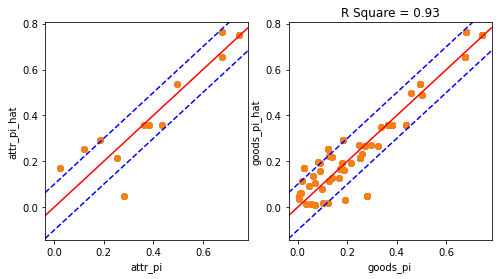

In [19]:
# method='dual_annealing' / 'differential_evolution'
mod.fit(method='dual_annealing',maxiter=1000)
# mod.fit(method='differential_evolution')

mod.summary(SimSale=sim_sale)

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [ True,  True, False, False, False, False]])

In [12]:
np.sum(mod.index_eft_flatten_attr_pi)

18

In [5]:
mod.attr_trans

[       A_a    A_b  A_c
 A_a    NaN    NaN  NaN
 A_b    NaN    NaN  NaN
 A_c  100.0  100.0  NaN,
        B_a    B_b    B_c
 B_a    NaN    NaN    NaN
 B_b  100.0    NaN  100.0
 B_c  100.0  100.0    NaN]

In [12]:
sale = Sale(attrs_num=[3,3])
sale.sim(unsale_pct=0.25)
df = sale.data_observed
df

,A_a*B_a,A_a*B_b,A_a*B_c,A_b*B_a,A_b*B_b,A_b*B_c,A_c*B_a,A_c*B_b,A_c*B_c
0,168,64,75,242,146,196,84,NaN,NaN
1,135,81,101,233,164,170,93,NaN,NaN
2,133,84,97,230,161,165,109,NaN,NaN
3,136,77,82,234,175,182,91,NaN,NaN
4,149,83,85,226,158,190,87,NaN,NaN
...,...,...,...,...,...,...,...,...,...
95,156,76,94,230,147,172,104,NaN,NaN
96,128,83,83,242,150,191,103,NaN,NaN
97,152,68,82,206,183,180,105,NaN,NaN
98,160,69,86,215,152,176,119,NaN,NaN


In [13]:
mod = Demand(data=df)
mod.fit(method='dual_annealing',maxiter=3000,only_effect=True)

In [14]:
mod.summary()

#################### 1.属性的选择概率 ####################
     Estimate     Guess   EG_Diff
A_a  0.305770  0.314740 -0.008970
A_b  0.482091  0.582603 -0.100513
A_c  0.212139  0.102656  0.109482
     Estimate     Guess   EG_Diff
B_a  0.470121  0.483912 -0.013791
B_b  0.250062  0.243554  0.006508
B_c  0.279817  0.272534  0.007283


In [11]:
True*False

0

In [15]:
sale.data_origin.iloc[[1]]

,A_a*B_a,A_a*B_b,A_a*B_c,A_b*B_a,A_b*B_b,A_b*B_c,A_c*B_a,A_c*B_b,A_c*B_c
1,135,81,101,233,126,120,93,48,63


In [16]:
df.iloc[[1]]

,A_a*B_a,A_a*B_b,A_a*B_c,A_b*B_a,A_b*B_b,A_b*B_c,A_c*B_a,A_c*B_b,A_c*B_c
1,135,81,101,233,164,170,93,NaN,NaN


In [17]:
mod.predict(df.iloc[[1]])

,A_a*B_a,A_a*B_b,A_a*B_c,A_b*B_a,A_b*B_b,A_b*B_c,A_c*B_a,A_c*B_b,A_c*B_c
0,146,78,87,230,122,137,101,54,60


array([[0.       , 0.       , 0.       , 0.       , 0.7884287, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.7884287,
        0.       ]])

In [11]:
total_sale

array([ 928.28032655, 1052.92378917, 1174.38807039, 1033.24061121,
       1016.87407833,  942.86733039,  923.63824929])

In [40]:
total_sale = data_sr.to_numpy()[index_sale] / (goods_f_sale + goods_f_unsale * goods_pi_unsale_to_sale)

ValueError: operands could not be broadcast together with shapes (7,) (7,2) 

In [46]:
(goods_f_sale.reshape(-1,1) + goods_f_unsale * goods_pi_unsale_to_sale)

array([[0.14845987, 0.14698449],
       [0.08403292, 0.07847887],
       [0.08721414, 0.09394445],
       [0.2314552 , 0.22855715],
       [0.13324034, 0.12233064],
       [0.13573559, 0.14895579],
       [0.1234025 , 0.11234144]])

In [4]:
np.any([False,True])

True